In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/home/ynoureddine/DSTI/books.csv",sep=",")

In [4]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic
...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12/1/1988,Penguin Books
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,8/1/1993,Penguin Books
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco


In [5]:
len(df)

11127

In [6]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10287.000000,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000
50%,20287.000000,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000
75%,32104.500000,4.135000,9.780870e+12,416.000000,4.993500e+03,237.500000
max,45641.000000,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000


In [7]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher'],
      dtype='object')

In [8]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         1
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

<h4> Authors column is string, useful too as a string but not if we need to do correlation for example, so we need to encode it ( keeping the author names as well ) in a new column authors_label</h4>

In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:
le = LabelEncoder()


In [11]:
df['authors_label'] = le.fit_transform(df['authors'])

In [12]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,authors_label
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2628
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2628
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,2624
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2628
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,2628
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press,6560
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12/1/1988,Penguin Books,6559
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,8/1/1993,Penguin Books,6559
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco,6559


In [13]:
from datetime import datetime
from datetime import date

In [14]:
df[['Month','Day','Year']] = df['publication_date'].str.split('/', expand=True)


In [15]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,authors_label,Month,Day,Year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2628,9,16,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2628,9,1,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,2624,11,1,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2628,5,1,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,2628,9,13,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,12/21/2004,Da Capo Press,6560,12,21,2004
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,12/1/1988,Penguin Books,6559,12,1,1988
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,8/1/1993,Penguin Books,6559,8,1,1993
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2/27/2007,Ecco,6559,2,27,2007


In [16]:
import matplotlib.pyplot as plt

In [17]:
def create_datetime_column(row):
    try:
        return pd.to_datetime(f"{int(row['Year'])}-{int(row['Month'])}-{int(row['Day'])}", errors='raise')
    except ValueError:
        return pd.NaT

In [18]:
df['publication_date'] = df.apply(create_datetime_column, axis=1)

In [19]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,authors_label,Month,Day,Year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,2006-09-16,Scholastic Inc.,2628,9,16,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,2004-09-01,Scholastic Inc.,2628,9,1,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,2003-11-01,Scholastic,2624,11,1,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,2004-05-01,Scholastic Inc.,2628,5,1,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,2004-09-13,Scholastic,2628,9,13,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,2004-12-21,Da Capo Press,6560,12,21,2004
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,1988-12-01,Penguin Books,6559,12,1,1988
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,1993-08-01,Penguin Books,6559,8,1,1993
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,2007-02-27,Ecco,6559,2,27,2007


In [20]:
#df['Month_Sin'] = np.sin(2 * np.pi * df['Month'] / 12)

In [21]:
df.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         1
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      2
publisher             0
authors_label         0
Month                 0
Day                   0
Year                  0
dtype: int64

In [22]:
df.sort_values(by=['publication_date'])

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,authors_label,Month,Day,Year
9375,37134,Consider the Lilies,Iain Crichton Smith/Isobel Murray,3.88,753812932,9.780750e+12,eng,144,332,33,1900-01-01,Polygon,2515,1,1,1900
6491,24459,On Duties (De Officiis),Marcus Tullius Cicero/Walter Miller,3.96,674990331,9.780670e+12,eng,448,111,11,1913-01-01,Harvard University Press,3994,1,1,1913
6819,25692,Agricola / Germania / Dialogue on Oratory,Tacitus/Maurice Hutton/Robert Maxwell Ogilvie/...,3.95,674990390,9.780670e+12,mul,384,87,7,1914-01-01,Harvard University Press,5979,1,1,1914
435,1440,History of the Peloponnesian War: Bk. 1-2,Thucydides/C.F. Smith,4.32,674991206,9.780670e+12,mul,496,208,7,1919-01-01,Harvard University Press,6108,1,1,1919
7144,27411,The Library 1 Books 1-3.9,Apollodorus/James George Frazer,3.93,674991354,9.780670e+12,mul,464,21,2,1921-01-01,Harvard University Press (Cambridge MA)/Wm He...,386,1,1,1921
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3982,14142,The Art of Loving,Erich Fromm/Peter D. Kramer/Rainer Funk,4.04,61129739,9.780060e+12,eng,192,38148,1310,2019-08-06,Harper Perennial Modern Classics,1751,8,6,2019
10339,41864,American Genesis: Captain John Smith and the F...,Alden T. Vaughan,3.43,673393550,9.780670e+12,eng,224,23,2,2019-08-17,Pearson,106,8,17,2019
9668,38568,A Quick Bite (Argeneau #1),Lynsay Sands,3.91,60773758,9.780060e+12,eng,360,35275,1370,2020-03-31,Avon,3937,3,31,2020
8180,31373,In Pursuit of the Proper Sinner (Inspector Lyn...,Elizabeth George,4.10,553575104,9.780550e+12,eng,718,10608,295,NaT,Bantam Books,1642,11,31,2000


In [23]:
# def plot_df(df, x, y, title="", xlabel='publication_date', ylabel='text_reviews_count', dpi=100):
#     plt.figure(figsize=(15,4), dpi=dpi)
#     plt.plot(x, y, color='tab:red')
#     plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
#     plt.show()
# plot_df(df, x=df['publication_date'], y=df['ratings_count'], title='n')    

In [24]:
# pd.plotting.autocorrelation_plot(df["publication_date"].resample("ratings_count").median())

In [25]:
# autocorrelation_result = df["Month"].resample("ratings_count").median().autocorr()

In [26]:
df.groupby(["authors","average_rating"]).mean()

bookID  \
authors                                            average_rating            
A.B. Yehoshua/Hillel Halkin                        3.43            30855.0   
                                                   3.77            27503.0   
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky       3.76            17883.0   
A.E. Cunningham/Harlan Ellison/Charles F. Mille... 4.15            40880.0   
A.J. Jacobs                                        3.76            28116.0   
...                                                                    ...   
Émile Zola/Robert Lethbridge/Elinor Dorday         4.01            28419.0   
Émile Zola/Robin Buss/Brian  Nelson                3.99            28413.0   
Émile Zola/Roger Pearson                           3.96            28409.0   
                                                   4.13            28407.0   
Éric-Emmanuel Schmitt                              3.82             4314.0   

                                                                         isbn13  \
authors                                            average_rating                 
A.B. Yehoshua/Hillel Halkin                        3.43            9.780150e+12   
                                                   3.77            9.780160e+12   
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky       3.76            9.780460e+12   
A.E. Cunningham/Harlan Ellison/Charles F. Mille... 4.15            9.780710e+12   
A.J. Jacobs                                        3.76            9.780740e+12   
...                                                                         ...   
Émile Zola/Robert Lethbridge/Elinor Dorday         4.01            9.780190e+12   
Émile Zola/Robin Buss/Brian  Nelson                3.99            9.780190e+12   
Émile Zola/Roger Pearson                           3.96            9.780190e+12   
                                                   4.13            9.780140e+12   
Éric-Emmanuel Schmitt                              3.82            9.782230e+12   

                                                                     num_pages  \
authors                                            average_rating                
A.B. Yehoshua/Hillel Halkin                        3.43                  256.0   
                                                   3.77                  576.0   
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky       3.76                  256.0   
A.E. Cunningham/Harlan Ellison/Charles F. Mille... 4.15                  232.0   
A.J. Jacobs                                        3.76                  389.0   
...                                                                        ...   
Émile Zola/Robert Lethbridge/Elinor Dorday         4.01                  592.0   
Émile Zola/Robin Buss/Brian  Nelson                3.99                  438.0   
Émile Zola/Roger Pearson                           3.96                  464.0   
                                                   4.13                  592.0   
Éric-Emmanuel Schmitt                              3.82                   85.0   

                                                                   ratings_count  \
authors                                            average_rating                  
A.B. Yehoshua/Hillel Halkin                        3.43                    851.0   
                                                   3.77                    457.0   
A.D.P. Briggs/Leo Tolstoy/Fyodor Dostoyevsky       3.76                     17.0   
A.E. Cunningham/Harlan Ellison/Charles F. Mille... 4.15                     13.0   
A.J. Jacobs                                        3.76                  24243.0   
...                                                                          ...   
Émile Zola/Robert Lethbridge/Elinor Dorday         4.01                    821.0   
Émile Zola/Robin Buss/Brian  Nelson                3.99                   5525.0   
Émile Zola/Roger Pearson                           3.96           

In [27]:
print(df.corr())

                      bookID  average_rating    isbn13    num_pages  \
bookID              1.000000       -0.036949 -0.002184    -0.026223   
average_rating     -0.036949        1.000000 -0.002013     0.150809   
isbn13             -0.002184       -0.002013  1.000000    -0.009822   
  num_pages        -0.026223        0.150809 -0.009822     1.000000   
ratings_count      -0.076815        0.038205  0.005491     0.034353   
text_reviews_count -0.081284        0.033734  0.008148     0.036998   
authors_label      -0.000988        0.022339 -0.027347     0.004334   

                    ratings_count  text_reviews_count  authors_label  
bookID                  -0.076815           -0.081284      -0.000988  
average_rating           0.038205            0.033734       0.022339  
isbn13                   0.005491            0.008148      -0.027347  
  num_pages              0.034353            0.036998       0.004334  
ratings_count            1.000000            0.865979       0.001521  
text_

In [28]:
df.text_reviews_count

0        27591
1        29221
2          244
3        36325
4          164
         ...  
11122       20
11123       56
11124       95
11125      139
11126       12
Name: text_reviews_count, Length: 11127, dtype: int64

In [29]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'authors_label', 'Month', 'Day',
       'Year'],
      dtype='object')

<h3>In our case, we are predicting the rating of a book using regression. The 'title' and 'authors' columns contain text data, and by applying NLP techniques, we can derive features that might capture meaningful patterns related to the language and sentiment in book titles and author names.</h3>

<h3> we will extract relevant information from the 'title' and 'authors' columns and create features like word count, average word length, and sentiment analysis scores using NLTK (Natural Language Toolkit), and TextBlob.</h3>

In [30]:
# !pip install TextBlob

In [31]:
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

In [32]:
nltk.download('punkt') #downloads the Punkt tokenizer models for tokenizing sentences into words
nltk.download('stopwords') #downloads a list of stopwords. Stopwords are common words 
#(like "and," "the," "is," etc.) that are often removed from text during preprocessing 
#because they are considered to carry little meaningful information.

[nltk_data] Downloading package punkt to
[nltk_data]     /home/ynoureddine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ynoureddine/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
# Function to calculate word count, average word length, and sentiment analysis score
def extract_text_features(text):
    # Word count
    word_count = len(nltk.word_tokenize(text))
    
    # Average word length
    words = [word for word in nltk.word_tokenize(text) if word.isalnum()]
    avg_word_length = sum(len(word) for word in words) / len(words) if len(words) > 0 else 0
    
    # Sentiment analysis score using TextBlob
    sentiment_score = TextBlob(text).sentiment.polarity
    
    return word_count, avg_word_length, sentiment_score

In [34]:
# Apply the function to 'title' column and create new features
df[['title_word_count', 'title_avg_word_length', 'title_sentiment_score']] = \
    df['title'].apply(lambda x: pd.Series(extract_text_features(x)))


In [35]:
df[['authors_word_count', 'authors_avg_word_length', 'authors_sentiment_score']] = \
    df['authors'].apply(lambda x: pd.Series(extract_text_features(x)))


In [36]:
df.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,authors_label,Month,Day,Year,title_word_count,title_avg_word_length,title_sentiment_score,authors_word_count,authors_avg_word_length,authors_sentiment_score
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,...,2628,9,16,2006,12.0,4.375000,0.0,3.0,8.0,0.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,...,2628,9,1,2004,14.0,4.181818,0.0,3.0,8.0,0.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,...,2624,11,1,2003,13.0,4.500000,0.0,2.0,7.0,0.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,...,2628,5,1,2004,13.0,4.600000,0.0,3.0,8.0,0.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,...,2628,9,13,2004,12.0,5.000000,0.0,3.0,8.0,0.0


In [37]:
df.title_sentiment_score

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
11122    0.0
11123    0.7
11124    0.0
11125   -0.4
11126    0.0
Name: title_sentiment_score, Length: 11127, dtype: float64

<h3> Extract more granular features from the 'publication_date', such as the day of the week, the season, or the quarter. </h3>
<h4> by incorporating these temporal features into our regression model, we provide it with additional dimensions of information that may capture time-dependent patterns in the data which may influence their ratings.These features offer our model more context about when books were published, allowing it to learn and potentially improve its predictive performance. </h4>


In [38]:
from datetime import datetime

In [39]:
# Convert 'publication_date' to datetime format
df['publication_date'] = pd.to_datetime(df['publication_date'], errors='coerce')

In [40]:
# Extract day of the week, season, and quarter
df['day_of_week'] = df['publication_date'].dt.dayofweek
df['season'] = (df['publication_date'].dt.month % 12 + 3) // 3
df['quarter'] = df['publication_date'].dt.quarter

In [41]:
# Calculate the age of the book
current_year = datetime.now().year
df['book_age'] = current_year - df['publication_date'].dt.year

In [42]:
df

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,...,title_word_count,title_avg_word_length,title_sentiment_score,authors_word_count,authors_avg_word_length,authors_sentiment_score,day_of_week,season,quarter,book_age
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,eng,652,2095690,27591,...,12.0,4.375000,0.0,3.0,8.0,0.0,5.0,4.0,3.0,18.0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,eng,870,2153167,29221,...,14.0,4.181818,0.0,3.0,8.0,0.0,2.0,4.0,3.0,20.0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,...,13.0,4.500000,0.0,2.0,7.0,0.0,5.0,4.0,4.0,21.0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,...,13.0,4.600000,0.0,3.0,8.0,0.0,5.0,2.0,2.0,20.0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,eng,2690,41428,164,...,12.0,5.000000,0.0,3.0,8.0,0.0,0.0,4.0,3.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,eng,512,156,20,...,9.0,5.428571,0.0,5.0,8.5,0.0,1.0,1.0,4.0,20.0
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,eng,635,783,56,...,5.0,4.600000,0.7,3.0,7.5,0.0,3.0,1.0,4.0,36.0
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,eng,415,820,95,...,8.0,3.750000,0.0,3.0,7.5,0.0,6.0,3.0,3.0,31.0
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,eng,434,769,139,...,2.0,5.000000,-0.4,3.0,7.5,0.0,1.0,1.0,1.0,17.0


<h4> Handling categorical features is an important step in preparing data for machine learning models. 
so we will apply the conversion of categorical variables like 'language_code' and explore potential features derived from the 'publisher' column </h4>

In [43]:
# One-hot encoding for 'language_code'
df = pd.get_dummies(df, columns=['language_code'], prefix='lang')


In [44]:
df

,bookID,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,652,2095690,27591,2006-09-16,...,0,0,0,0,0,0,0,0,0,0
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,870,2153167,29221,2004-09-01,...,0,0,0,0,0,0,0,0,0,0
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,352,6333,244,2003-11-01,...,0,0,0,0,0,0,0,0,0,0
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,435,2339585,36325,2004-05-01,...,0,0,0,0,0,0,0,0,0,0
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,2690,41428,164,2004-09-13,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,512,156,20,2004-12-21,...,0,0,0,0,0,0,0,0,0,0
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,635,783,56,1988-12-01,...,0,0,0,0,0,0,0,0,0,0
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,415,820,95,1993-08-01,...,0,0,0,0,0,0,0,0,0,0
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,434,769,139,2007-02-27,...,0,0,0,0,0,0,0,0,0,0


In [45]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,authors_label,title_word_count,title_avg_word_length,title_sentiment_score,...,lang_nl,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127.000000,11127.000000,11127.000000,11127.000000,...,11127.00000,11127.00000,11127.000000,11127.000000,11127.000000,11127.00000,11127.000000,11127.00000,11127.00000,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,3339.290824,7.131302,5.079813,0.035293,...,0.00009,0.00009,0.000899,0.000180,0.019592,0.00009,0.000180,0.00009,0.00009,0.001258
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,1910.265226,4.681508,1.389402,0.198506,...,0.00948,0.00948,0.029966,0.013406,0.138600,0.00948,0.013406,0.00948,0.00948,0.035450
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.000000,-1.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
25%,10287.000000,3.770000,9.780350e+12,192.000000,1.040000e+02,9.000000,1677.500000,3.000000,4.200000,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
50%,20287.000000,3.960000,9.780590e+12,299.000000,7.450000e+02,46.000000,3337.000000,6.000000,4.857143,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
75%,32104.500000,4.135000,9.780870e+12,416.000000,4.993500e+03,237.500000,4990.000000,10.000000,5.666667,0.000000,...,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000
max,45641.000000,5.000000,9.790010e+12,6576.000000,4.597666e+06,94265.000000,6642.000000,37.000000,17.000000,1.000000,...,1.00000,1.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.00000,1.000000


<h4> Categorize publishers based on certain criteria, such as the number of books they have published </h4>

In [46]:
# Calculate the number of books published by each publisher
publisher_counts = df['publisher'].value_counts()

# Define your criteria for categorizing publishers
small_threshold = 5  # Example: Publishers with less than 5 books are considered small
medium_threshold = 10  # Example: Publishers with 5 to 10 books are considered medium

# Categorize publishers based on the criteria
df['publisher_size'] = df['publisher'].apply(lambda x: 'Small' if publisher_counts[x] < small_threshold 
                                             else ('Medium' if small_threshold <= publisher_counts[x] <= medium_threshold 
                                                   else 'Large'))


In [47]:
df

,bookID,title,authors,average_rating,isbn,isbn13,num_pages,ratings_count,text_reviews_count,publication_date,...,lang_nor,lang_por,lang_rus,lang_spa,lang_srp,lang_swe,lang_tur,lang_wel,lang_zho,publisher_size
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780440e+12,652,2095690,27591,2006-09-16,...,0,0,0,0,0,0,0,0,0,Large
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780440e+12,870,2153167,29221,2004-09-01,...,0,0,0,0,0,0,0,0,0,Large
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,352,6333,244,2003-11-01,...,0,0,0,0,0,0,0,0,0,Large
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780440e+12,435,2339585,36325,2004-05-01,...,0,0,0,0,0,0,0,0,0,Large
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780440e+12,2690,41428,164,2004-09-13,...,0,0,0,0,0,0,0,0,0,Large
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,45631,Expelled from Eden: A William T. Vollmann Reader,William T. Vollmann/Larry McCaffery/Michael He...,4.06,1560254416,9.781560e+12,512,156,20,2004-12-21,...,0,0,0,0,0,0,0,0,0,Large
11123,45633,You Bright and Risen Angels,William T. Vollmann,4.08,140110879,9.780140e+12,635,783,56,1988-12-01,...,0,0,0,0,0,0,0,0,0,Large
11124,45634,The Ice-Shirt (Seven Dreams #1),William T. Vollmann,3.96,140131965,9.780140e+12,415,820,95,1993-08-01,...,0,0,0,0,0,0,0,0,0,Large
11125,45639,Poor People,William T. Vollmann,3.72,60878827,9.780060e+12,434,769,139,2007-02-27,...,0,0,0,0,0,0,0,0,0,Large


In [48]:
df = df.rename(columns={'  num_pages': 'num_pages'})


<h4> As a next step, we will combine features,it is a powerful way to create new variables that might capture more complex relationships between data. </h4>

In [49]:
# Create a new feature representing engagement per page This feature might help capture the level of 
# reader engagement normalized by the book's length.
df['engagement_per_page'] = df['ratings_count'] / df['num_pages']


<h4> we will add a new feature 'weighted_rating', by multiplying the 'average_rating' by the 'ratings_count'. It gives more weight to books with higher average ratings and a larger number of ratings.

This feature could capture not only how well a book is rated on average but also account for the popularity of the book in terms of the number of ratings.</h4>

In [50]:
# Create a new feature representing a weighted rating
df['weighted_rating'] = df['average_rating'] * df['ratings_count']


In [51]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'authors_label', 'Month', 'Day', 'Year',
       'title_word_count', 'title_avg_word_length', 'title_sentiment_score',
       'authors_word_count', 'authors_avg_word_length',
       'authors_sentiment_score', 'day_of_week', 'season', 'quarter',
       'book_age', 'lang_ale', 'lang_ara', 'lang_en-CA', 'lang_en-GB',
       'lang_en-US', 'lang_eng', 'lang_enm', 'lang_fre', 'lang_ger',
       'lang_gla', 'lang_glg', 'lang_grc', 'lang_ita', 'lang_jpn', 'lang_lat',
       'lang_msa', 'lang_mul', 'lang_nl', 'lang_nor', 'lang_por', 'lang_rus',
       'lang_spa', 'lang_srp', 'lang_swe', 'lang_tur', 'lang_wel', 'lang_zho',
       'publisher_size', 'engagement_per_page', 'weighted_rating'],
      dtype='object')

In [52]:
df.day_of_week

0        5.0
1        2.0
2        5.0
3        5.0
4        0.0
        ... 
11122    1.0
11123    3.0
11124    6.0
11125    1.0
11126    6.0
Name: day_of_week, Length: 11127, dtype: float64

In [53]:
df.columns

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'num_pages', 'ratings_count', 'text_reviews_count', 'publication_date',
       'publisher', 'authors_label', 'Month', 'Day', 'Year',
       'title_word_count', 'title_avg_word_length', 'title_sentiment_score',
       'authors_word_count', 'authors_avg_word_length',
       'authors_sentiment_score', 'day_of_week', 'season', 'quarter',
       'book_age', 'lang_ale', 'lang_ara', 'lang_en-CA', 'lang_en-GB',
       'lang_en-US', 'lang_eng', 'lang_enm', 'lang_fre', 'lang_ger',
       'lang_gla', 'lang_glg', 'lang_grc', 'lang_ita', 'lang_jpn', 'lang_lat',
       'lang_msa', 'lang_mul', 'lang_nl', 'lang_nor', 'lang_por', 'lang_rus',
       'lang_spa', 'lang_srp', 'lang_swe', 'lang_tur', 'lang_wel', 'lang_zho',
       'publisher_size', 'engagement_per_page', 'weighted_rating'],
      dtype='object')

<h4> Training </h4>

In [54]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [55]:

X = df.drop(['average_rating','title', 'authors', 'isbn', 'publication_date', 'publisher', 'Month', 'Day', 'Year', 'publisher_size'], axis=1)


In [56]:
y = df['average_rating']


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
# Create a LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)


In [59]:
# Define hyperparameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'mse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

In [60]:
# Train the LightGBM model
num_round = 1000
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data], early_stopping_rounds=10)


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000320 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2573
[LightGBM] [Info] Number of data points in the train set: 8901, number of used features: 25
[LightGBM] [Info] Start training from score 3.932881
[1]	valid_0's l2: 0.118862
Training until validation scores don't improve for 10 rounds
[2]	valid_0's l2: 0.116783
[3]	valid_0's l2: 0.114927
[4]	valid_0's l2: 0.113094
[5]	valid_0's l2: 0.112143
[6]	valid_0's l2: 0.110603
[7]	valid_0's l2: 0.109532
[8]	valid_0's l2: 0.108153
[9]	valid_0's l2: 0.107073
[10]	valid_0's l2: 0.106354
[11]	valid_0's l2: 0.10588
[12]	valid_0's l2: 0.104822
[13]	valid_0's l2: 0.10403
[14]	valid_0's l2: 0.103517
[15]	valid_0's l2: 0.103211
[16]	valid_0's l2: 0.102541
[17]	valid_0's l2: 0.101829
[18]	valid_0's l2: 0.101616
[19]	valid_0's l2: 0.101257
[20]	valid

[381]	valid_0's l2: 0.0649078
[382]	valid_0's l2: 0.0649004
[383]	valid_0's l2: 0.0648864
[384]	valid_0's l2: 0.0647531
[385]	valid_0's l2: 0.0647215
[386]	valid_0's l2: 0.0646363
[387]	valid_0's l2: 0.0646062
[388]	valid_0's l2: 0.0646516
[389]	valid_0's l2: 0.0645342
[390]	valid_0's l2: 0.0645079
[391]	valid_0's l2: 0.0644874
[392]	valid_0's l2: 0.0644523
[393]	valid_0's l2: 0.0644459
[394]	valid_0's l2: 0.0644617
[395]	valid_0's l2: 0.0644323
[396]	valid_0's l2: 0.0644094
[397]	valid_0's l2: 0.0643638
[398]	valid_0's l2: 0.0642822
[399]	valid_0's l2: 0.064308
[400]	valid_0's l2: 0.0643283
[401]	valid_0's l2: 0.0643086
[402]	valid_0's l2: 0.0642966
[403]	valid_0's l2: 0.0641223
[404]	valid_0's l2: 0.0640732
[405]	valid_0's l2: 0.0640588
[406]	valid_0's l2: 0.0639425
[407]	valid_0's l2: 0.0640516
[408]	valid_0's l2: 0.0639958
[409]	valid_0's l2: 0.0639729
[410]	valid_0's l2: 0.0640428
[411]	valid_0's l2: 0.0639055
[412]	valid_0's l2: 0.0638933
[413]	valid_0's l2: 0.0638339
[414]	valid

In [61]:
# Make predictions on the test set
predictions = bst.predict(X_test, num_iteration=bst.best_iteration)


In [62]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.061838750356000116


In [63]:
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

RMSE: 0.24867398407553637


In [64]:
import matplotlib.pyplot as plt

In [66]:
sorted_indices = np.argsort(y_test)

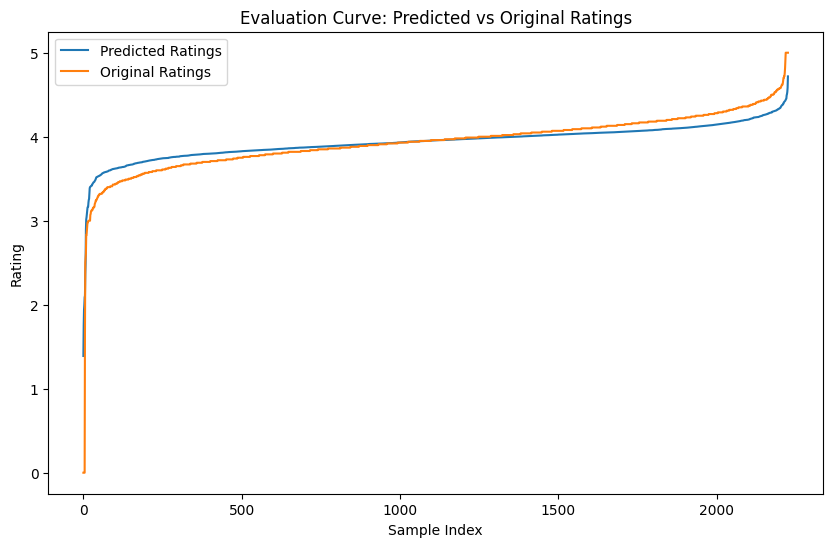

In [67]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(predictions)), np.sort(predictions), label='Predicted Ratings')
plt.plot(np.arange(len(predictions)), np.sort(y_test), label='Original Ratings')
plt.xlabel('Sample Index')
plt.ylabel('Rating')
plt.title('Evaluation Curve: Predicted vs Original Ratings')
plt.legend()
plt.show()


The Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) are common metrics used to evaluate the performance of regression models. 
In our case:

    Mean Squared Error (MSE): 0.0618 suggests that, on average, the squared difference between the predicted and actual ratings is relatively low.
    Root Mean Squared Error (RMSE): 0.2487 on average, our model's predictions are off by approximately 0.25 rating units.  

<h2>Our next steps will involve further model refinement and tuning to potentially improve performance. </h2>

Hyperparameter tuning is a crucial step to find the optimal set of hyperparameters. Two common techniques for hyperparameter tuning are grid search and random search. 

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [71]:
# Instantiate GridSearchCV
grid_search = GridSearchCV(lgb.LGBMRegressor(), param_grid, scoring='neg_mean_squared_error', cv=3)


In [72]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max

GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 7, 10],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [73]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'subsample': 0.8}


In [74]:
# Train the model with the best hyperparameters
best_model = lgb.LGBMRegressor(**best_params)
best_model.fit(X_train, y_train)

LGBMRegressor(learning_rate=0.2, max_depth=10, subsample=0.8)

<h4>Lets evaluate </h4>

In [75]:
# Make predictions on the test set
test_predictions = best_model.predict(X_test)

In [76]:
# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, test_predictions)
print(f'Mean Squared Error on Test Set: {test_mse}')

Mean Squared Error on Test Set: 0.06424176385935146


<h4>Visualize feature importances to understand the key factors influencing the model predictions.
The plot displays the relative importance of each feature, with longer bars indicating higher impact.</h4>

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

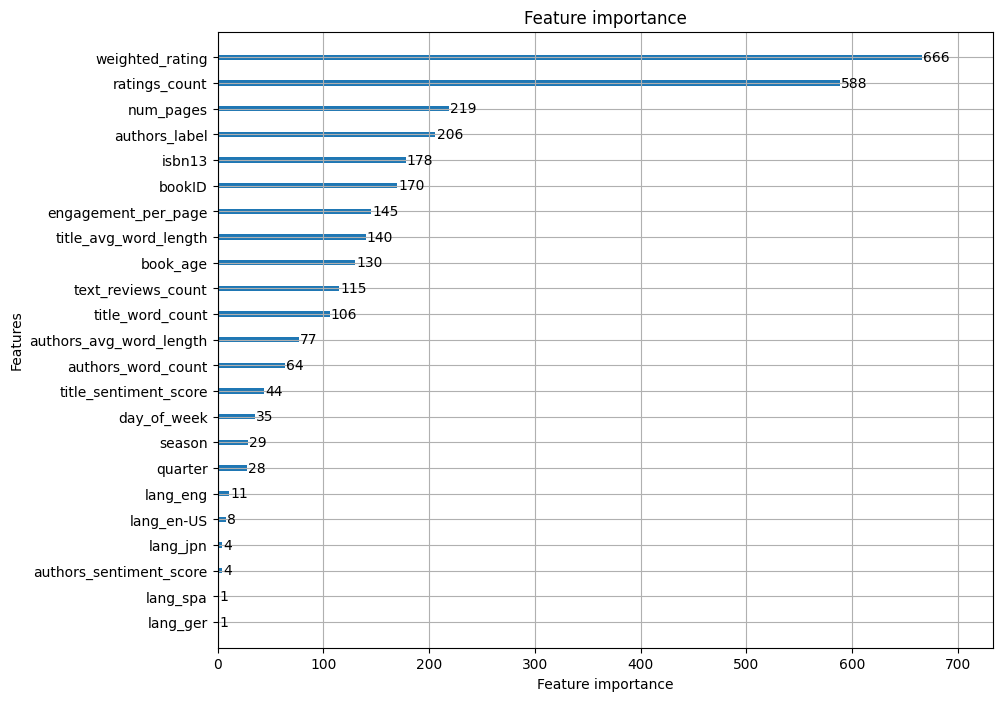

In [77]:
lgb.plot_importance(best_model, figsize=(10, 8))

In [78]:
new_predictions = best_model.predict(X_test)

In [79]:
# Sort predictions and original ratings for the plot
sorted_predictions = np.sort(new_predictions)
sorted_original_ratings = np.sort(y_test)

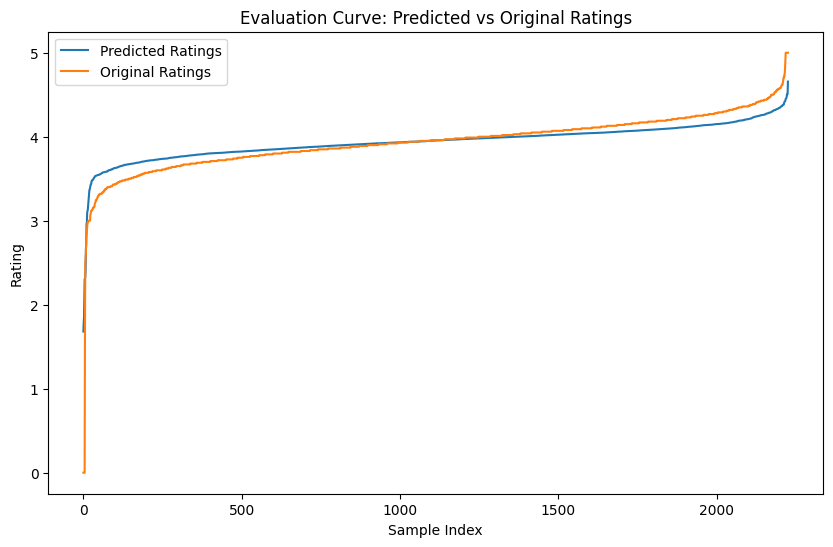

In [80]:
# Plot the evaluation curve
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(sorted_predictions)), sorted_predictions, label='Predicted Ratings')
plt.plot(np.arange(len(sorted_original_ratings)), sorted_original_ratings, label='Original Ratings')
plt.xlabel('Sample Index')
plt.ylabel('Rating')
plt.title('Evaluation Curve: Predicted vs Original Ratings')
plt.legend()
plt.show()

In [81]:
mse = mean_squared_error(sorted_original_ratings, sorted_predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.020674734277853258


In [82]:
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 0.14378711443607614


In [83]:
# Calculate Percentage Error for each prediction
percentage_errors = np.abs(sorted_original_ratings - sorted_predictions) / sorted_original_ratings * 100


/home/ynoureddine/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


In [84]:
average_percentage_error = np.mean(percentage_errors)
print(f'Average Percentage Error: {average_percentage_error}%')


Average Percentage Error: inf%


In [89]:
#add a small constant to the denominator to prevent values containing zeros.
percentage_errors = np.abs(sorted_original_ratings - sorted_predictions) / (sorted_original_ratings + 1e-8) * 100

In [90]:
average_percentage_error = np.mean(percentage_errors)
print(f'Average Percentage Error: {average_percentage_error}%')

Average Percentage Error: 43623583.422741435%


In [95]:
percentage_errors = np.abs(sorted_original_ratings - sorted_predictions) / (sorted_original_ratings + 1e-8) * 100

print(percentage_errors)

[1.68075636e+10 1.78412817e+10 1.84451670e+10 ... 9.88233832e+00
 9.84443055e+00 6.87392598e+00]


In [92]:
mse = mean_squared_error(sorted_original_ratings, sorted_predictions)
rmse = np.sqrt(mse)

In [93]:
print(mse)

0.020674734277853258


In [94]:
print(rmse)

0.14378711443607614
